<a href="https://colab.research.google.com/github/FGalvao77/Clusteriza-o-com-K-Means/blob/main/Clusteriza%C3%A7%C3%A3o_com_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clusterização com `K-Means`**
---
---

In [1]:
!curl https://raw.githubusercontent.com/saichandrareddy1/Machine_Learning_basics/master/total_data_na.csv >> total_data_na.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11572  100 11572    0     0  94081      0 --:--:-- --:--:-- --:--:-- 94081


In [2]:
!head total_data_na.csv

PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,X50,X4s,X6s,Mat.y,Inns.y,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
Aaron Finch,10,9,1,134,46,16.75,100,134,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,0
AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30,0,0,0,0,0,0,0,0,0,0,0,0
Abhishek Sharma,3,3,2,63,46,63,33,190.9,0,0,3,5,0,0,0,0,0,0,0,0,0,0,0,0
Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,1,39,5,0,0,0,0,0,0,0,0,0,0,0,0
Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,0,0,0,0,0,0,0,0,0,0,0,0
Ambati Rayudu,16,16,2,602,100,43,402,149.75,1,3,53,34,0,0,0,0,0,0,0,0,0,0,0,0
Andre Russell,16,14,3,316,88,28.72,171,184.79,0,1,17,31,16,15,37.5,355,13,0,27.3,9.38,17.46,0,0,0
Andrew Tye,14,8,2,32,14,5.33,38,84.21,0,0,2,1,14,14,56,448,24,0,18.66,8,14,3,0,0
Axar Patel,9,8,2,80,19,13.33,69,115.94,0,0,3,4,9,8,26,218,3,0,72.66,8.38,52,0,0,0


In [3]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('total_data_na.csv')

In [5]:
df.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  143 non-null    object 
 1   Mat.x   143 non-null    int64  
 2   Inns.x  143 non-null    int64  
 3   NO      143 non-null    int64  
 4   Runs.x  143 non-null    int64  
 5   HS      143 non-null    int64  
 6   Avg.x   143 non-null    object 
 7   BF      143 non-null    int64  
 8   SR.x    143 non-null    float64
 9   X100    143 non-null    int64  
 10  X50     143 non-null    int64  
 11  X4s     143 non-null    int64  
 12  X6s     143 non-null    int64  
 13  Mat.y   143 non-null    int64  
 14  Inns.y  143 non-null    int64  
 15  Ov      143 non-null    float64
 16  Runs.y  143 non-null    int64  
 17  Wkts    143 non-null    int64  
 18  BBI     143 non-null    int64  
 19  Avg.y   143 non-null    object 
 20  Econ    143 non-null    float64
 21  SR.y    143 non-null    object 
 22  X4

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mat.x,143.0,7.286713,6.077692,0.0,0.0,7.00,13.000,17.00
Inns.x,143.0,6.013986,5.499022,0.0,0.0,5.00,11.000,17.00
NO,143.0,1.251748,1.629259,0.0,0.0,1.00,2.000,9.00
Runs.x,143.0,132.349650,175.482243,0.0,0.0,52.00,202.000,735.00
HS,143.0,33.153846,31.969684,0.0,0.0,27.00,53.500,128.00
BF,143.0,95.027972,120.286919,0.0,0.0,41.00,152.500,516.00
SR.x,143.0,93.120280,67.202818,0.0,0.0,117.02,140.595,300.00
X100,143.0,0.034965,0.219236,0.0,0.0,0.00,0.000,2.00
X50,143.0,0.706294,1.447836,0.0,0.0,0.00,1.000,8.00
X4s,143.0,11.461538,16.706147,0.0,0.0,3.00,17.000,68.00


In [8]:
df.isna().sum()

PLAYER    0
Mat.x     0
Inns.x    0
NO        0
Runs.x    0
HS        0
Avg.x     0
BF        0
SR.x      0
X100      0
X50       0
X4s       0
X6s       0
Mat.y     0
Inns.y    0
Ov        0
Runs.y    0
Wkts      0
BBI       0
Avg.y     0
Econ      0
SR.y      0
X4w       0
X5w       0
y         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

%matplotlib inline
# plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
rcParams['figure.figsize'] = 14, 7

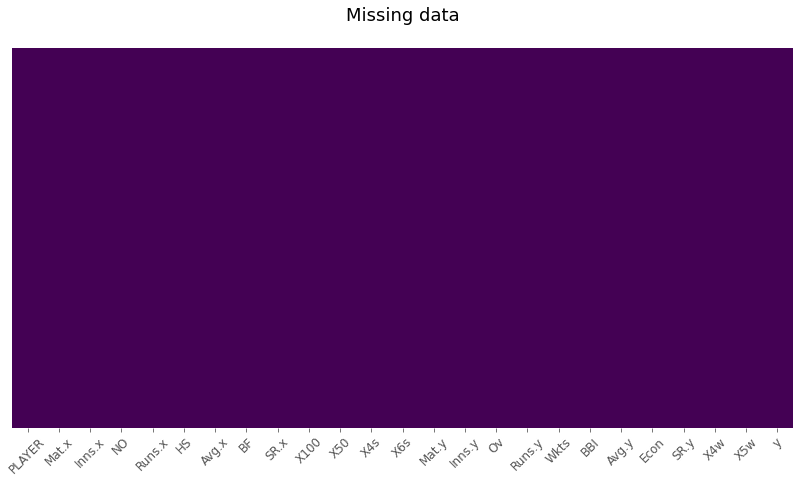

In [10]:
sns.heatmap(
    data=df.isnull(), 
    yticklabels=False, cbar=False,
    cmap='viridis'
)

plt.title('Missing data\n', size=18)
plt.xticks(rotation=45, size=12)
plt.show()

In [11]:
df.corr()[:-1]

,Mat.x,Inns.x,NO,Runs.x,HS,BF,SR.x,X100,X50,X4s,...,Mat.y,Inns.y,Ov,Runs.y,Wkts,BBI,Econ,X4w,X5w,y
Mat.x,1.000000,0.916473,0.621347,0.723136,0.744583,0.739628,0.777217,0.182690,0.523431,0.673888,...,0.116253,0.053495,0.023220,0.004212,-0.003295,NaN,-0.444839,0.032654,-0.100965,NaN
Inns.x,0.916473,1.000000,0.562398,0.872369,0.854022,0.888250,0.713870,0.239087,0.657717,0.823222,...,-0.090843,-0.165696,-0.196373,-0.219665,-0.193785,NaN,-0.567797,-0.058499,-0.092099,NaN
NO,0.621347,0.562398,1.000000,0.396723,0.409319,0.397643,0.495803,0.014614,0.279354,0.305141,...,0.160959,0.078428,0.040074,0.050595,0.025118,NaN,-0.148006,0.013796,-0.064700,NaN
Runs.x,0.723136,0.872369,0.396723,1.000000,0.884152,0.990385,0.555502,0.384814,0.893337,0.972272,...,-0.277629,-0.317310,-0.322647,-0.342976,-0.304923,NaN,-0.606136,-0.115846,-0.063514,NaN
HS,0.744583,0.854022,0.409319,0.884152,1.000000,0.874033,0.739197,0.402134,0.762310,0.830474,...,-0.280735,-0.327453,-0.344854,-0.361960,-0.337882,NaN,-0.659862,-0.137067,-0.087332,NaN
BF,0.739628,0.888250,0.397643,0.990385,0.874033,1.000000,0.546344,0.344715,0.873881,0.966648,...,-0.295080,-0.343517,-0.348025,-0.369168,-0.328013,NaN,-0.627006,-0.109389,-0.066529,NaN
SR.x,0.777217,0.713870,0.495803,0.555502,0.739197,0.546344,1.000000,0.149589,0.383659,0.503606,...,-0.061619,-0.111514,-0.144184,-0.152878,-0.164780,NaN,-0.472677,-0.099631,-0.116691,NaN
X100,0.182690,0.239087,0.014614,0.384814,0.402134,0.344715,0.149589,1.000000,0.254441,0.349349,...,0.011148,-0.018097,-0.041368,-0.038496,-0.060587,NaN,-0.088353,-0.029084,-0.013431,NaN
X50,0.523431,0.657717,0.279354,0.893337,0.762310,0.873881,0.383659,0.254441,1.000000,0.881713,...,-0.367646,-0.355474,-0.332206,-0.346807,-0.303347,NaN,-0.555473,-0.088962,-0.041081,NaN
X4s,0.673888,0.823222,0.305141,0.972272,0.830474,0.966648,0.503606,0.349349,0.881713,1.000000,...,-0.301860,-0.325787,-0.318031,-0.340483,-0.298979,NaN,-0.608277,-0.107375,-0.057776,NaN


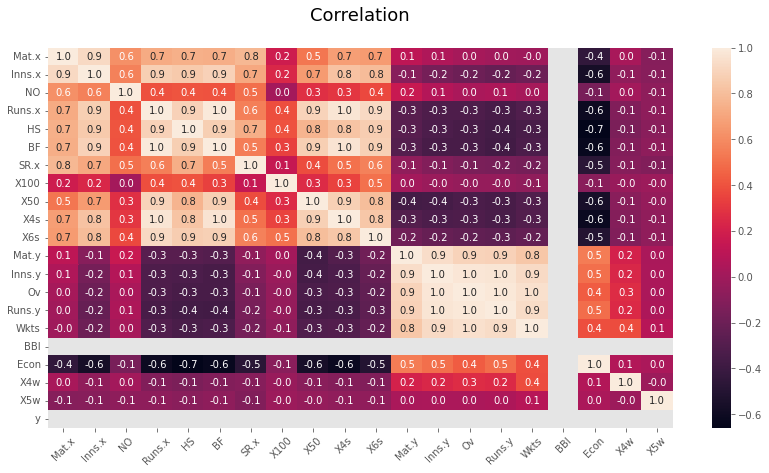

In [12]:
correlation = df.corr()

sns.heatmap(
    data=correlation.drop('y', axis=1),
    # cmap='hot',
    annot=True,
    fmt='.1f'
)

plt.title('Correlation\n', size=18)
plt.xticks(rotation=45)
plt.show()

In [13]:
df.columns

Index(['PLAYER', 'Mat.x', 'Inns.x', 'NO', 'Runs.x', 'HS', 'Avg.x', 'BF',
       'SR.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y', 'Ov', 'Runs.y',
       'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y', 'X4w', 'X5w', 'y'],
      dtype='object')

In [14]:
df.drop(['PLAYER', 'y'], axis=1, inplace=True)

In [15]:
categorical_vars = df.select_dtypes(include='O').columns

categorical_vars

Index(['Avg.x', 'Avg.y', 'SR.y'], dtype='object')

In [16]:
df.drop(labels=categorical_vars, axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat.x   143 non-null    int64  
 1   Inns.x  143 non-null    int64  
 2   NO      143 non-null    int64  
 3   Runs.x  143 non-null    int64  
 4   HS      143 non-null    int64  
 5   BF      143 non-null    int64  
 6   SR.x    143 non-null    float64
 7   X100    143 non-null    int64  
 8   X50     143 non-null    int64  
 9   X4s     143 non-null    int64  
 10  X6s     143 non-null    int64  
 11  Mat.y   143 non-null    int64  
 12  Inns.y  143 non-null    int64  
 13  Ov      143 non-null    float64
 14  Runs.y  143 non-null    int64  
 15  Wkts    143 non-null    int64  
 16  BBI     143 non-null    int64  
 17  Econ    143 non-null    float64
 18  X4w     143 non-null    int64  
 19  X5w     143 non-null    int64  
dtypes: float64(3), int64(17)
memory usage: 22.5 KB


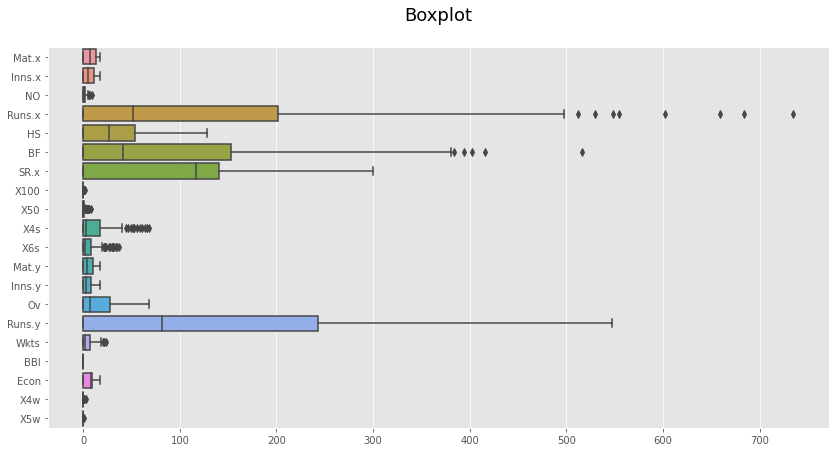

In [18]:
sns.boxplot(data=df, orient='h')

plt.title('Boxplot\n', size=18)
plt.xticks(rotation=0)
plt.show()

In [19]:
def separators(col:str) -> str:

    Q1 = np.quantile(col, 0.25)
    Q3 = np.quantile(col, 0.75)

    IQR = Q3 - Q1

    upper_limit = Q3 +1.5 *IQR
    inferior_limit = Q1 -1.5 *IQR

    return round(upper_limit, 2), round(inferior_limit, 2)

In [20]:
separators(df['Runs.x'])

(505.0, -303.0)

In [21]:
sup, inf = separators(df['Runs.x'])

In [22]:
sup, inf

(505.0, -303.0)

In [23]:
run_out = df[df['Runs.x'] > sup].index

df.loc[run_out, 'Runs.x'] = sup

In [24]:
df['Runs.x'].max(), df['Runs.x'].min()

(505, 0)

In [25]:
sup, inf = separators(df['BF'])
print(sup, inf)

bf_out = df[df['BF'] > sup].index

df.loc[bf_out, 'BF'] = sup

df['BF'].max(), df['BF'].min()

381.25 -228.75


(381.25, 0.0)

In [26]:
sup, inf = separators(df['X4s'])
print(sup, inf)

x4s_out = df[df['X4s'] > sup].index

df.loc[x4s_out, 'X4s'] = sup

df['X4s'].max(), df['X4s'].min()

42.5 -25.5


(42.5, 0.0)

In [27]:
sup, inf = separators(df['X6s'])
print(sup, inf)

x6s_out = df[df['X6s'] > sup].index

df.loc[x6s_out, 'X6s'] = sup

df['X6s'].max(), df['X6s'].min()

20.0 -12.0


(20, 0)

In [28]:
sup, inf = separators(df['Wkts'])
print(sup, inf)

wkts_out = df[df['Wkts'] > sup].index

df.loc[wkts_out, 'Wkts'] = sup

df['Wkts'].max(), df['Wkts'].min()

18.75 -11.25


(18.75, 0.0)

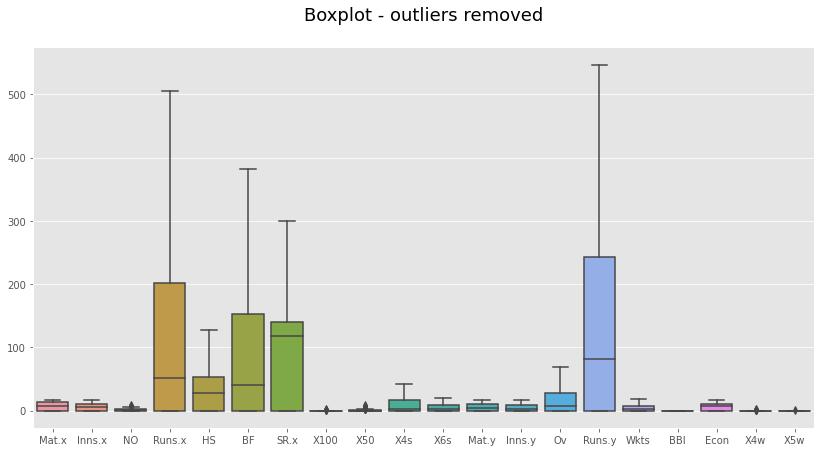

In [29]:
sns.boxplot(data=df)

plt.title('Boxplot - outliers removed\n', size=18)
plt.xticks(rotation=0)
plt.show()

In [30]:
from scipy.stats import skew

Mat.x
0.07580070648211645



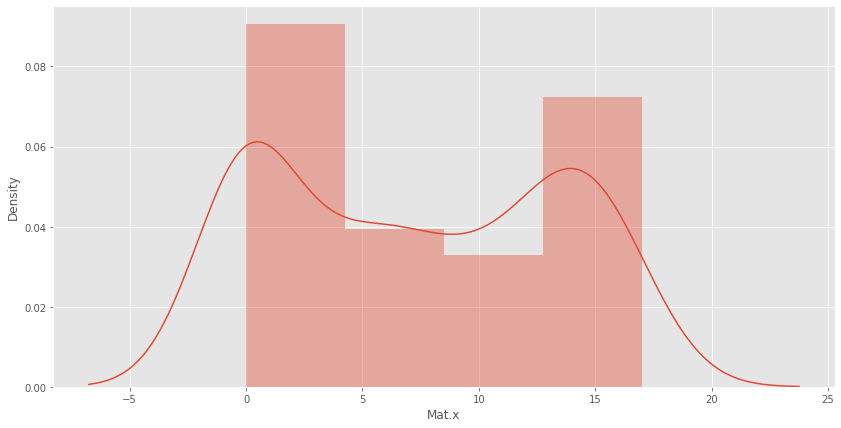

Inns.x
0.42770332009084794



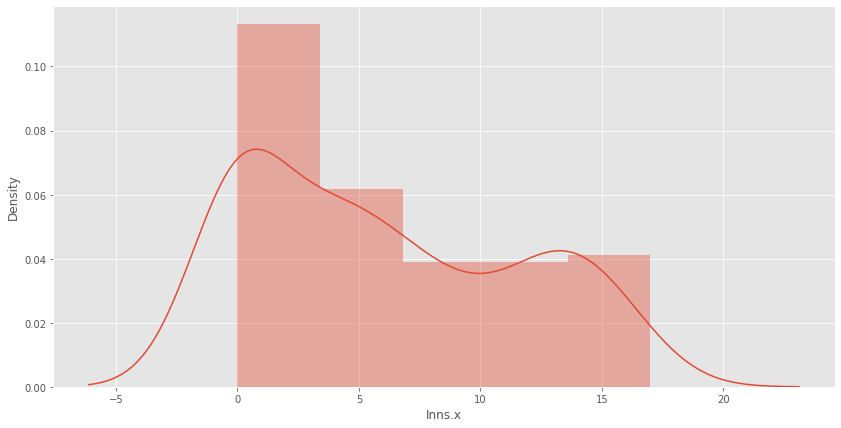

NO
1.717447440547279



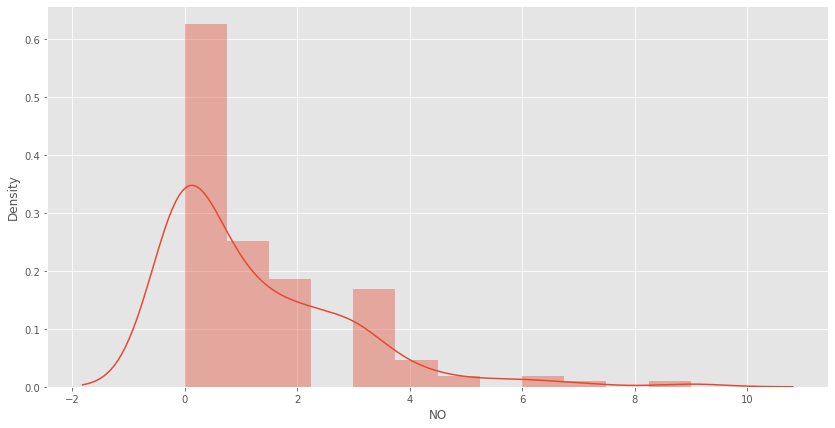

Runs.x
1.2658218844431892



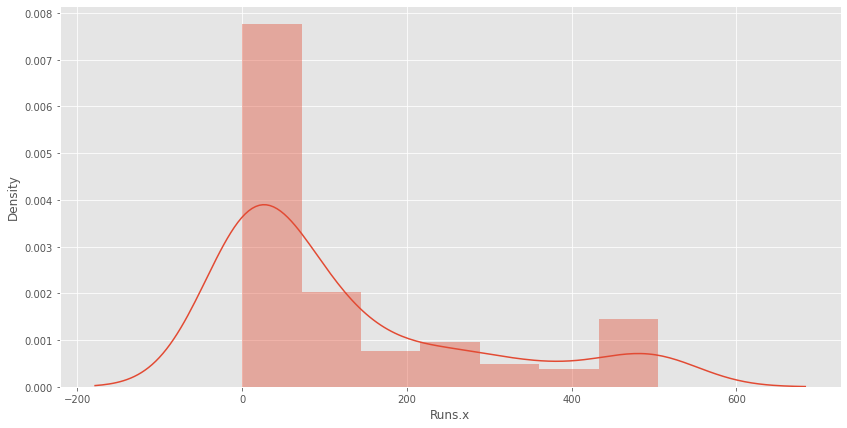

HS
0.7391454774064703



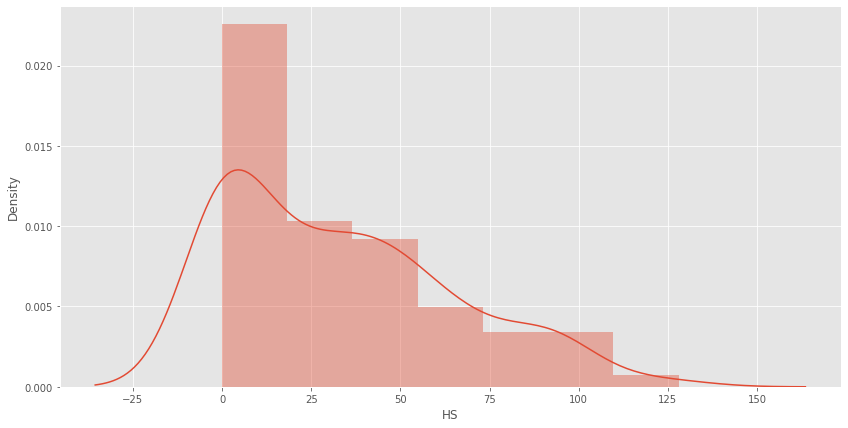

BF
1.2849533117562681



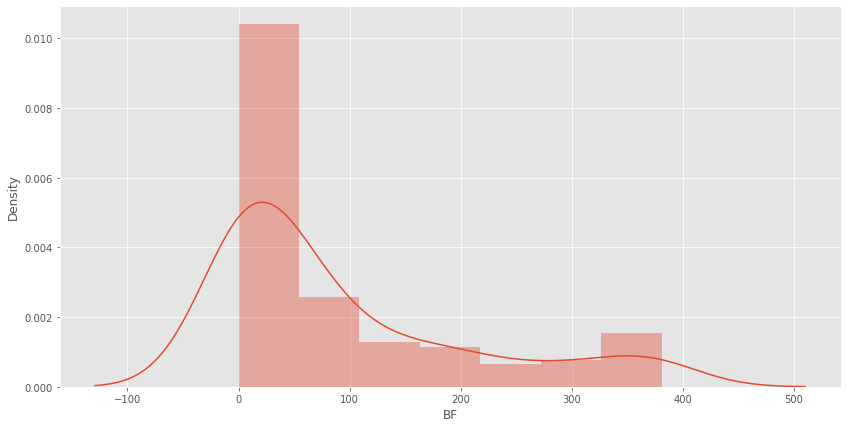

SR.x
-0.25773348793914563



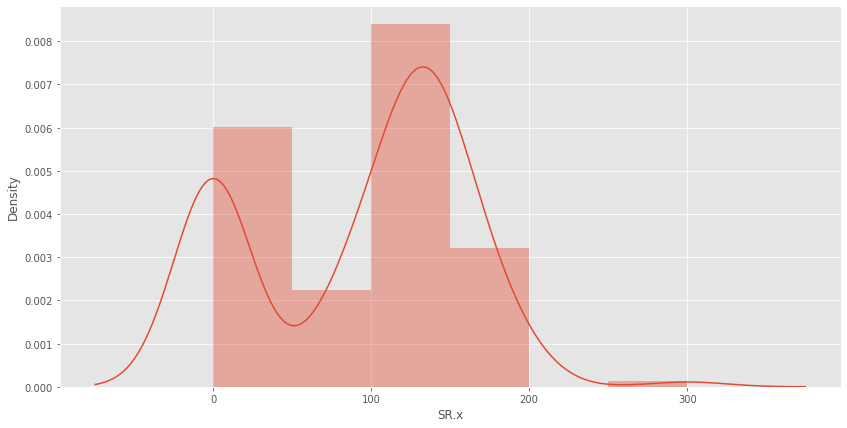

X100
6.892936271264464



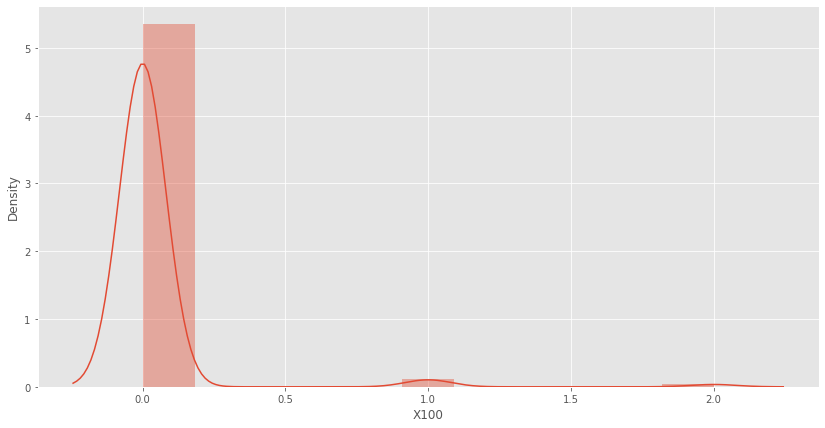

X50
2.5052439125468493



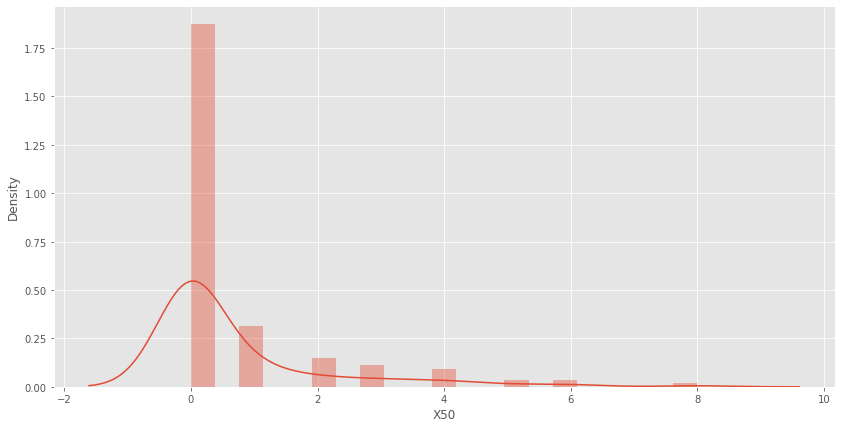

X4s
1.302338071917717



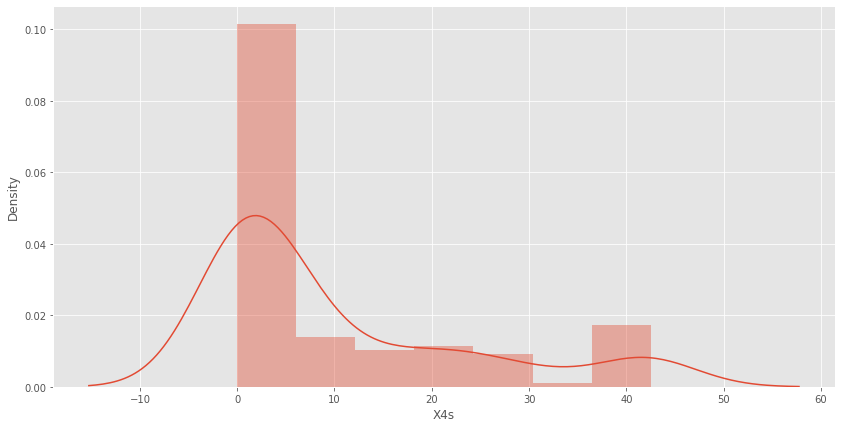

X6s
1.1649074729912177



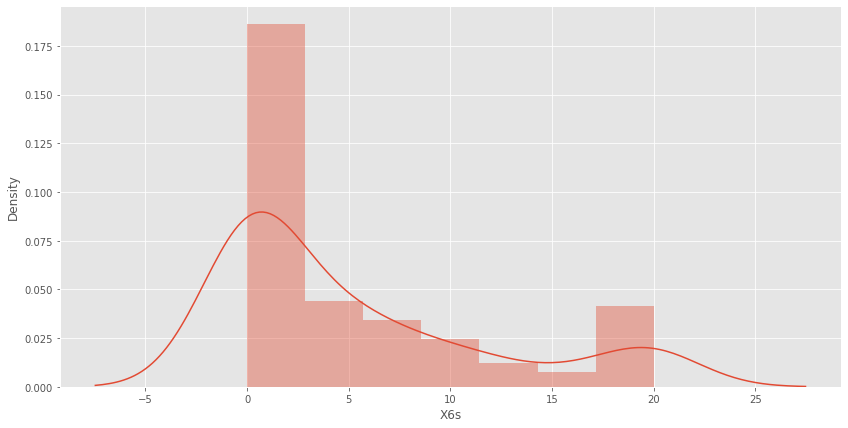

Mat.y
0.5657374572184163



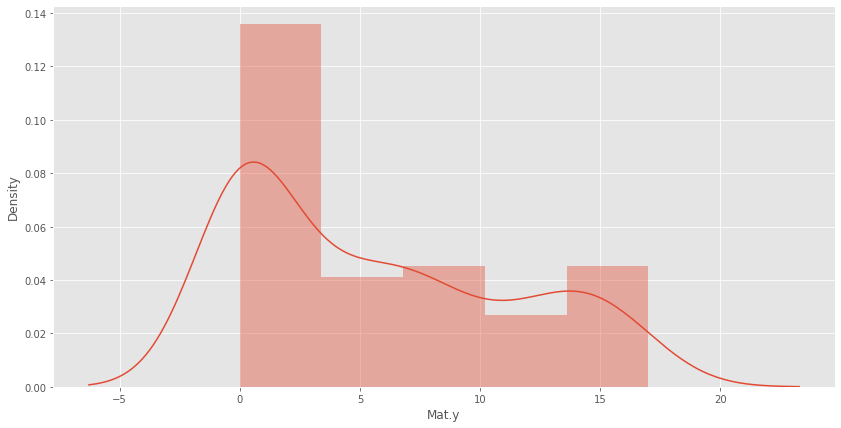

Inns.y
0.7642229601139375



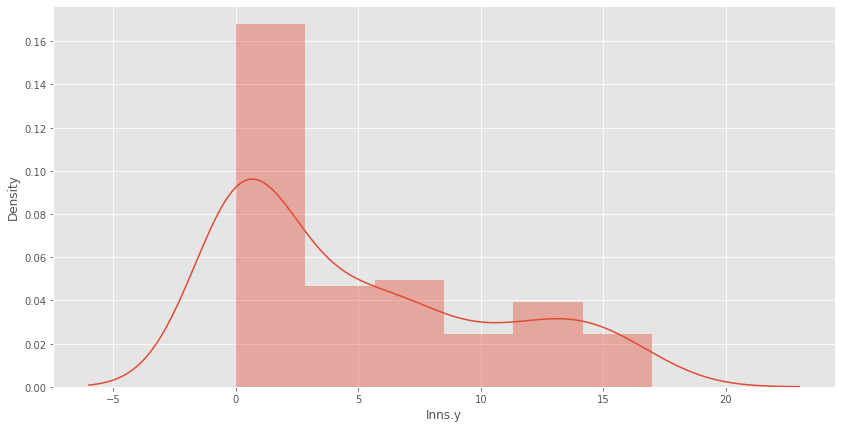

Ov
0.9778656243554076



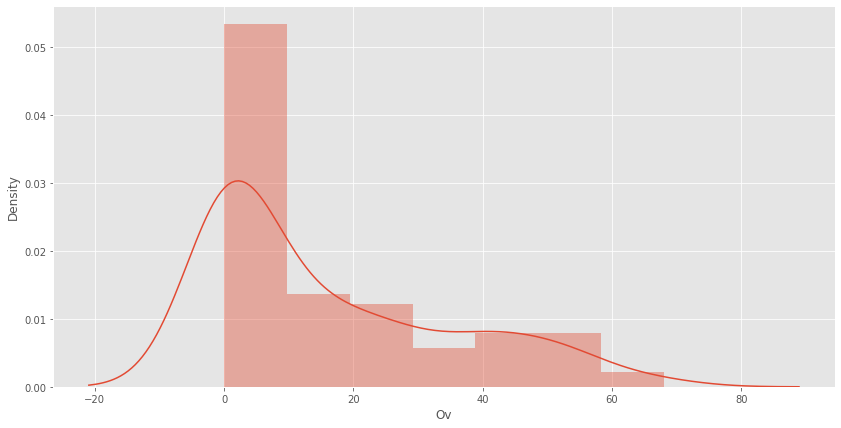

Runs.y
0.8851968871419482



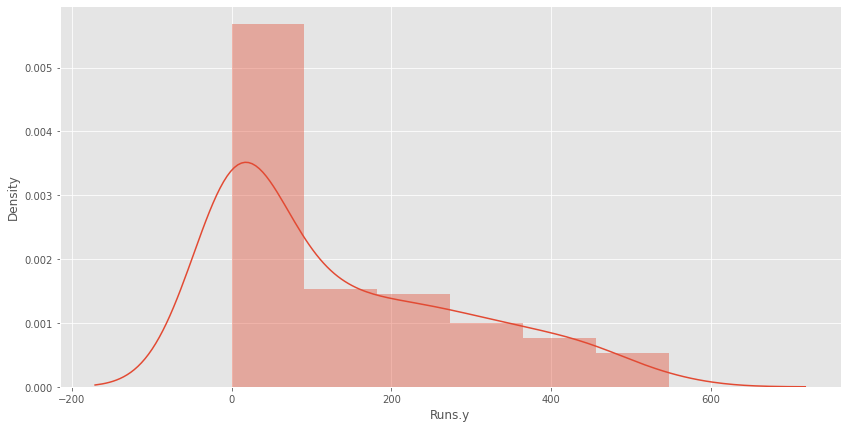

Wkts
1.1032415779836604



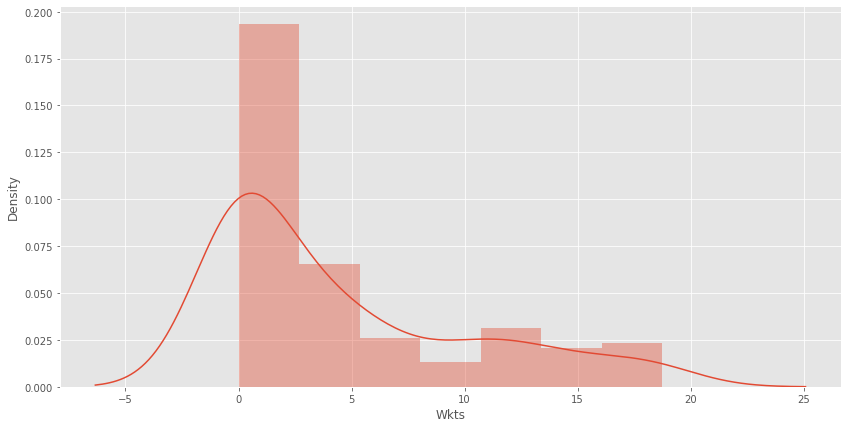

BBI
0.0



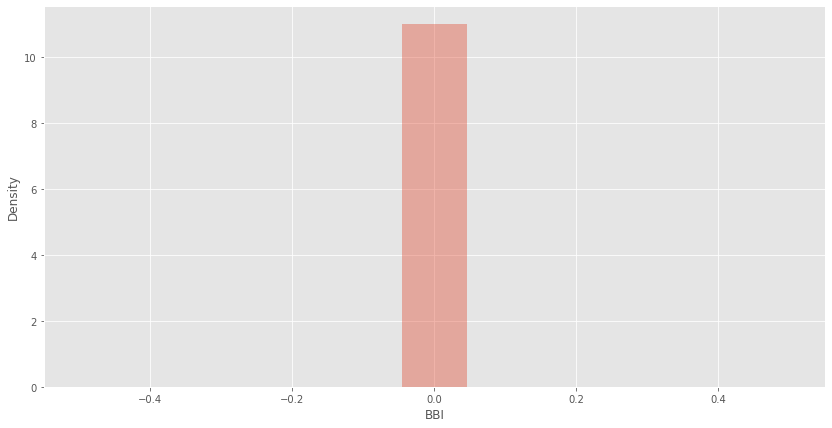

Econ
-0.27618384376075306



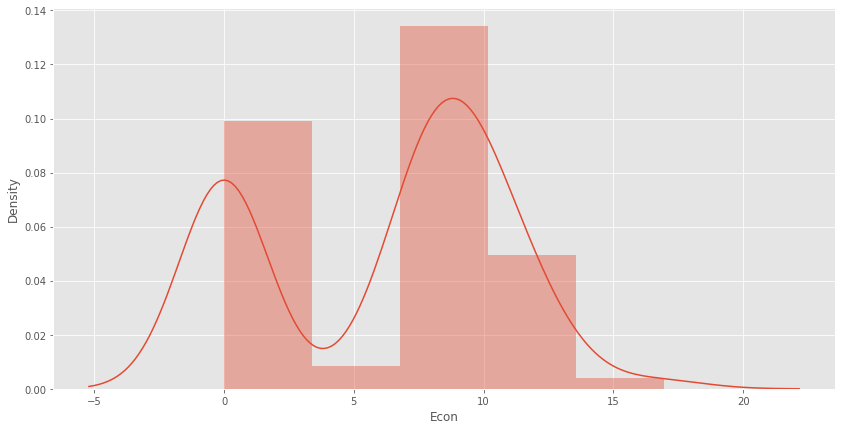

X4w
7.118755653768533



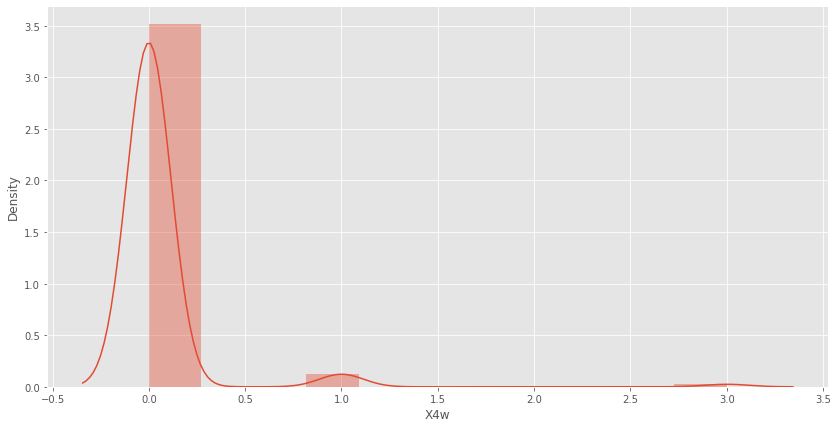

X5w
11.83245715198333



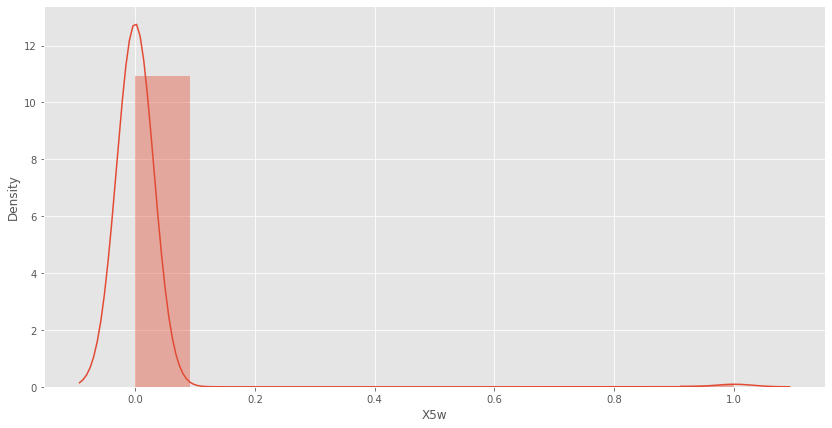

In [31]:
cols = df.columns

for i in cols:
    print(i)
    print(skew(df[i]), end='\n\n')

    sns.distplot(df[i])
    plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
std_scal = StandardScaler()

In [34]:
df = std_scal.fit_transform(df)

In [35]:
from sklearn.cluster import KMeans

In [36]:
values = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=1522)
    kmeans.fit(df)
    values.append(kmeans.inertia_)

values

[2717.0,
 1775.5417914832929,
 1342.2589204105607,
 1124.9776950948917,
 981.1330040356765,
 866.4355095433066,
 754.2015333449839,
 638.2140964472967,
 557.8558863145188,
 492.6745466097709]

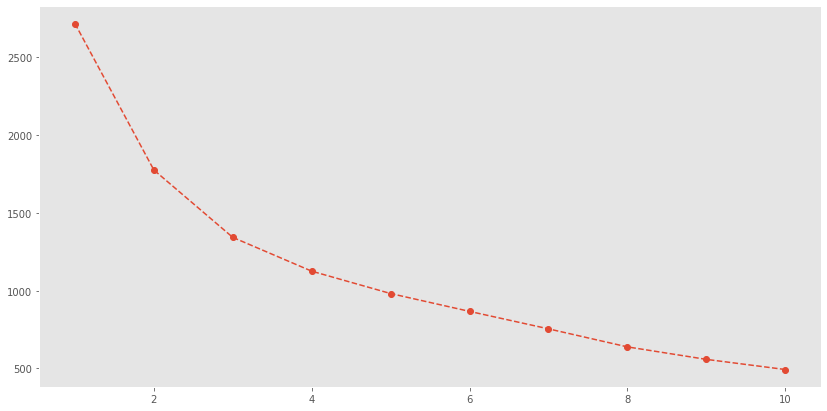

In [37]:
plt.plot(range(1, 11), values, 'o--')
plt.grid()
plt.show()

In [38]:
kmeans = KMeans(n_clusters=4, random_state=1522)

ylabel = kmeans.fit_predict(df)

In [39]:
ylabel

array([0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 3, 0, 0, 3, 0,
       3, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2,
       0, 0, 1, 1, 2, 3, 0, 0, 2, 0, 0, 0, 1, 3, 0, 3, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 3, 0, 1, 2, 0,
       3, 1, 2, 2, 1, 3, 0, 2, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1], dtype=int32)

In [40]:
pd.DataFrame(ylabel).value_counts()

3    46
0    43
1    29
2    25
dtype: int64

In [41]:
df = pd.DataFrame(df)

In [42]:
df['target'] = ylabel

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.448003,0.544917,-0.155060,0.044627,0.403235,0.055376,0.610442,-0.160046,-0.489542,-0.317744,...,-0.997548,-0.932704,-0.855674,-0.896204,-0.801915,0.0,-1.320607,-0.181724,-0.083918,0
1,0.778232,0.909896,0.460873,2.207278,1.784377,1.567009,1.215811,-0.160046,3.669141,2.096801,...,-0.997548,-0.932704,-0.855674,-0.896204,-0.801915,0.0,-1.320607,-0.181724,-0.083918,2
2,-0.707798,-0.550021,0.460873,-0.399154,0.403235,-0.523363,1.460109,-0.160046,-0.489542,-0.537248,...,-0.997548,-0.932704,-0.855674,-0.896204,-0.801915,0.0,-1.320607,-0.181724,-0.083918,0
3,1.273575,1.457365,-0.155060,1.519730,0.999637,1.895249,0.374656,-0.160046,0.203572,2.096801,...,-0.997548,-0.932704,-0.855674,-0.896204,-0.801915,0.0,-1.320607,-0.181724,-0.083918,2
4,-0.212455,-0.002552,-0.770993,0.132133,0.371846,0.210858,0.482320,-0.160046,-0.489542,0.194432,...,-0.997548,-0.932704,-0.855674,-0.896204,-0.801915,0.0,-1.320607,-0.181724,-0.083918,0


In [44]:
kmeans.cluster_centers_

array([[ 0.02945692,  0.11203427,  0.14574447, -0.09855133,  0.27840705,
        -0.08403551,  0.59688437, -0.1600461 , -0.27999593, -0.10334431,
        -0.04424869, -0.4101731 , -0.56447586, -0.60704857, -0.6202466 ,
        -0.61347488,  0.        , -0.4915118 , -0.18172434, -0.08391814],
       [ 0.59034296,  0.10442443,  0.39715585, -0.25604022, -0.21589703,
        -0.28596981,  0.21900089, -0.1600461 , -0.3700396 , -0.24962165,
        -0.19026938,  1.48032373,  1.61740948,  1.63607851,  1.59939886,
         1.57307629,  0.        ,  0.43493912,  0.4903424 , -0.08391814],
       [ 1.19432032,  1.49386343,  0.51014773,  1.87700457,  1.53200468,
         1.89464438,  0.72967589,  0.75541759,  1.8115962 ,  1.821689  ,
         1.71731709, -0.7841075 , -0.81348505, -0.78294388, -0.81914236,
        -0.73145456,  0.        , -1.18259178, -0.18172434, -0.08391814],
       [-1.04879568, -0.98244278, -0.66387446, -0.76657045, -0.95675231,
        -0.77085778, -1.0925859 , -0.1600461 , -

In [45]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [46]:
from sklearn.model_selection import train_test_split as tts

In [47]:
Xtrain, Xval, ytrain, yval = tts(
    X, y, test_size=0.3, random_state=1522
)

In [48]:
from sklearn.metrics import classification_report

In [49]:
def algorithm(model:str) -> str:

    model.fit(Xtrain, ytrain)
    ypred = model.predict(Xval)

    train_score = model.score(Xtrain, ytrain)
    val_score = model.score(Xval, yval)

    print(f'[ACCURACY] Training  : {train_score}')
    print(f'[ACCURACY] Validation: {val_score}\n\n')

    print(classification_report(y_true=yval, y_pred=ypred))

    return model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# from sklearn.metrics import accuracy_score as acc

In [51]:
logReg = algorithm(LogisticRegression())

[ACCURACY] Training  : 1.0
[ACCURACY] Validation: 0.9534883720930233


              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.90      1.00      0.95         9
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        12

    accuracy                           0.95        43
   macro avg       0.94      0.97      0.95        43
weighted avg       0.96      0.95      0.95        43



In [52]:
decTree = algorithm(DecisionTreeClassifier())

[ACCURACY] Training  : 1.0
[ACCURACY] Validation: 0.9069767441860465


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.80      0.89      0.84         9
           2       1.00      1.00      1.00         6
           3       0.91      0.83      0.87        12

    accuracy                           0.91        43
   macro avg       0.91      0.91      0.91        43
weighted avg       0.91      0.91      0.91        43



In [53]:
kNeigh = algorithm(KNeighborsClassifier())

[ACCURACY] Training  : 0.94
[ACCURACY] Validation: 0.8837209302325582


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.56      0.71         9
           2       1.00      1.00      1.00         6
           3       0.73      0.92      0.81        12

    accuracy                           0.88        43
   macro avg       0.92      0.87      0.87        43
weighted avg       0.90      0.88      0.88        43



In [54]:
svc = algorithm(SVC())

[ACCURACY] Training  : 0.97
[ACCURACY] Validation: 0.9302325581395349


              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.90      1.00      0.95         9
           2       0.86      1.00      0.92         6
           3       1.00      0.92      0.96        12

    accuracy                           0.93        43
   macro avg       0.92      0.95      0.93        43
weighted avg       0.93      0.93      0.93        43



In [55]:
gauss = algorithm(GaussianNB())

[ACCURACY] Training  : 0.93
[ACCURACY] Validation: 0.8837209302325582


              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00         6
           3       0.82      0.75      0.78        12

    accuracy                           0.88        43
   macro avg       0.92      0.88      0.89        43
weighted avg       0.89      0.88      0.88        43



In [56]:
bernoulli = algorithm(BernoulliNB())

[ACCURACY] Training  : 0.86
[ACCURACY] Validation: 0.7441860465116279


              precision    recall  f1-score   support

           0       1.00      0.56      0.72        16
           1       0.71      0.56      0.63         9
           2       0.60      1.00      0.75         6
           3       0.71      1.00      0.83        12

    accuracy                           0.74        43
   macro avg       0.76      0.78      0.73        43
weighted avg       0.80      0.74      0.73        43



In [57]:
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
BernoulliNB              ABCMeta                   <class 'sklearn.naive_bayes.BernoulliNB'>
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GaussianNB               ABCMeta                   <class 'sklearn.naive_bayes.GaussianNB'>
KMeans                   type                      <class 'sklearn.cluster._kmeans.KMeans'>
KNeighborsClassifier     ABCMeta                   <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LogisticRegression       type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
SVC                      ABCMeta                   <class 'sklearn.svm._classes.SVC'>
StandardScaler           type                      <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                        DataFrame                             0         1  <...>\n[143

In [58]:
%who_ls 

['BernoulliNB',
 'DecisionTreeClassifier',
 'GaussianNB',
 'KMeans',
 'KNeighborsClassifier',
 'LogisticRegression',
 'SVC',
 'StandardScaler',
 'X',
 'Xtrain',
 'Xval',
 'algorithm',
 'bernoulli',
 'bf_out',
 'categorical_vars',
 'classification_report',
 'cols',
 'correlation',
 'decTree',
 'df',
 'gauss',
 'i',
 'inf',
 'kNeigh',
 'kmeans',
 'logReg',
 'np',
 'pd',
 'plt',
 'rcParams',
 'run_out',
 'separators',
 'skew',
 'sns',
 'std_scal',
 'sup',
 'svc',
 'tts',
 'values',
 'warnings',
 'wkts_out',
 'x4s_out',
 'x6s_out',
 'y',
 'ylabel',
 'ytrain',
 'yval']